# Understanding the data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%pylab inline
import copy
from googletrans import Translator
import emoji
import re

In [3]:
#Names = ['u_id','m_id','time','forward_count','comment_count','like_count','content']
Names = ['u_id','m_id','time','content']

train_dataset= pd.read_fwf("G:\\weibo_train_data.txt",header=None,names=Names ,encoding='utf-8',delimiter="\t")

# fixed width formatted lines.

# Observing the dataset 

In [3]:
train_dataset.head(10)

,u_id,m_id,time,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0\t0\t0\t丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0\t0\t0\t#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,0\t0\t0\t淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,0\t4\t3\t看点不能说的，你们都懂[笑cry]
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,2015-03-10 18:02:38,0\t0\t0\t111多张
5,d80f3d3c5c1d658e82b837a4dd1af849,bfc0819b83ec59ce767287077f2b3507,2015-02-13 01:09:41,0\t0\t0\t有生之年！我最喜欢的up主跟我的三体勾搭到一起了！幸福感爆棚！ @黑桐谷歌...
6,f349a67d1cd7c8683c5bbc5f8486e193,83674a60e5310195fc35d97ea8f45c46,2015-07-15 01:16:24,0\t0\t0\t论优衣库试衣间隔音效果好坏？ http://t.cn/RL5aSzp（分享...
7,24b621c98f2594b698c0b1d60c9ae6db,2cbd3d514ed5ad3dab81aa043c8b3d0a,2015-05-19 10:24:57,0\t0\t0\t如此平凡的日常一幕，还能够再积累多少呢。 终有一天，当我们到了看着这张照片...
8,e44d81d630e4f382f657e72aa4b685da,8a88a25f9f26ed9f79080eaacc1a8668,2015-02-11 11:03:36,0\t1\t0\t#罗永浩的红包#二十三，糖瓜儿粘，抢个红包乐翻天！我抢到了罗永浩 和@_王...
9,fbe6c953632e1b3dda66cf6118b6ab12,f359a74cb4ac6150a3af8325eda04ea0,2015-03-22 00:54:34,0\t0\t0\t有好东西分享给你！闪记笔记记事，最好用的中文待办软件，还等什么？快去下载：...


In [4]:
print("Predict_Dataset has "+str(train_dataset.shape[0])+" records")

Predict_Dataset has 1229618 records


In [6]:
print("Predict_Dataset has "+str(train_dataset.shape[1])+" attributes")

Predict_Dataset has 4 attributes


In [6]:
train_content_mix=train_dataset['content']

In [7]:
train_content_split = pd.DataFrame(train_content_mix.str.split('\t',expand=True))
print(train_content_split.head(5))

   0  1  2                                                  3
0  0  0  0  丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1  0  0  0  #丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2  0  0  0                      淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3  0  4  3                                  看点不能说的，你们都懂[笑cry]
4  0  0  0                                              111多张


In [8]:
#frames = [train_data,train_content_split]
#esult = pd.concat(frames)
#df['uid']=train_data['u_id']

train_dataset2 = pd.concat([train_dataset,train_content_split], axis=1)
print(train_dataset2.head(5))

                               u_id                              m_id  \
0  d38e9bed5d98110dc2489d0d1cac3c2a  7d45833d9865727a88b960b0603c19f6   
1  fa13974743d3fe6ff40d21b872325e9e  8169f1d45051e08ef213bf1106b1225d   
2  da534fe87e7a52777bee5c30573ed5fd  68cd0258c31c2c525f94febea2d9523b   
3  e06a22b7e065e559a1f0bf7841a85c51  00b9f86b4915aedb7db943c54fd19d59   
4  f9828598f9664d4e347ef2048ce17734  c7f6f66044c0c5a3330e2c5371be6824   

                  time                                            content  0  \
0  2015-02-23 17:41:29  0\t0\t0\t丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包...  0   
1  2015-02-14 12:49:58  0\t0\t0\t#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪...  0   
2  2015-03-31 13:58:06             0\t0\t0\t淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了  0   
3  2015-06-11 20:39:57                         0\t4\t3\t看点不能说的，你们都懂[笑cry]  0   
4  2015-03-10 18:02:38                                     0\t0\t0\t111多张  0   

   1  2                                                  3  
0  0  0  丽江旅游(sz002

In [9]:
del train_dataset2['content']
train_dataset2.rename(columns={0:'forward_count'},inplace=True)
train_dataset2.rename(columns={1:'comment_count'},inplace=True)
train_dataset2.rename(columns={2:'like_count'},inplace=True)
train_dataset2.rename(columns={3:'content'},inplace=True)
train_dataset2.head(5)

,u_id,m_id,time,forward_count,comment_count,like_count,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,0,0,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,0,4,3,看点不能说的，你们都懂[笑cry]
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,2015-03-10 18:02:38,0,0,0,111多张


In [17]:
translate_dataframe = pd.DataFrame(data=train_dataset2['content'].head(10))
translator = Translator()
translate_dataframe["English_content"] = translate_dataframe['content'].map(lambda x: translator.translate(x, src="zh-CN", dest="en").text)

                                             content
0  丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1  #丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2                      淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3                                  看点不能说的，你们都懂[笑cry]
4                                              111多张


In [18]:
print(translate_dataframe)

                                             content  \
0  丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...   
1  #丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...   
2                      淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了   
3                                  看点不能说的，你们都懂[笑cry]   
4                                              111多张   
5  有生之年！我最喜欢的up主跟我的三体勾搭到一起了！幸福感爆棚！ @黑桐谷歌  http://...   
6        论优衣库试衣间隔音效果好坏？ http://t.cn/RL5aSzp（分享自 @知乎）   
7  如此平凡的日常一幕，还能够再积累多少呢。 终有一天，当我们到了看着这张照片能感受到一阵怀念的...   
8  #罗永浩的红包#二十三，糖瓜儿粘，抢个红包乐翻天！我抢到了罗永浩 和@_王先森就是我 一起发...   
9  有好东西分享给你！闪记笔记记事，最好用的中文待办软件，还等什么？快去下载： http://t...   

                                     English_content  
0  Lijiang Tourism (sz002033)#Stock##炒股##财经##理财##...  
1  #丁辰灵的红包# Earning money is a kind of ability. I...  
2  Taobao.com is stupid. . . The labor of the gas...  
3  You can't say anything, you all know [laughing...  
4                                      More than 111  
5  For a lifetime! My favorite up master is with ... 

In [19]:
train_dataset2.head(30)

,u_id,m_id,time,forward_count,comment_count,like_count,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,0,0,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,0,4,3,看点不能说的，你们都懂[笑cry]
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,2015-03-10 18:02:38,0,0,0,111多张
5,d80f3d3c5c1d658e82b837a4dd1af849,bfc0819b83ec59ce767287077f2b3507,2015-02-13 01:09:41,0,0,0,有生之年！我最喜欢的up主跟我的三体勾搭到一起了！幸福感爆棚！ @黑桐谷歌 http://...
6,f349a67d1cd7c8683c5bbc5f8486e193,83674a60e5310195fc35d97ea8f45c46,2015-07-15 01:16:24,0,0,0,论优衣库试衣间隔音效果好坏？ http://t.cn/RL5aSzp（分享自 @知乎）
7,24b621c98f2594b698c0b1d60c9ae6db,2cbd3d514ed5ad3dab81aa043c8b3d0a,2015-05-19 10:24:57,0,0,0,如此平凡的日常一幕，还能够再积累多少呢。 终有一天，当我们到了看着这张照片能感受到一阵怀念的...
8,e44d81d630e4f382f657e72aa4b685da,8a88a25f9f26ed9f79080eaacc1a8668,2015-02-11 11:03:36,0,1,0,#罗永浩的红包#二十三，糖瓜儿粘，抢个红包乐翻天！我抢到了罗永浩 和@_王先森就是我 一起发...
9,fbe6c953632e1b3dda66cf6118b6ab12,f359a74cb4ac6150a3af8325eda04ea0,2015-03-22 00:54:34,0,0,0,有好东西分享给你！闪记笔记记事，最好用的中文待办软件，还等什么？快去下载： http://t...


In [ ]:
emoji_pattern=re.compile("["
                         u"\U0001F600-\U0001F64F"
                         u"\U0001F300-\U0001F5FF"
                         u"\U0001F680-\U0001F6FF"
                         u"\U0001F1E0-\U0001F1FF"
                         "]+",flags=re.UNICODE)
train_dataset2['content']=emoji_pattern.sub(r'',str(train_dataset2['content']))

In [1]:
translate_dataframe = pd.DataFrame(data=train_dataset2['content'].head(30))
translator = Translator()
translate_dataframe["English_content"] = translate_dataframe['content'].map(lambda x: translator.translate(x, src="zh-CN", dest="en").text)

In [19]:
train_dataset2.forward_count.describe()

count     1229618
unique       1243
top             0
freq      1009457
Name: forward_count, dtype: object

In [14]:
train_dataset2.comment_count.describe()

count     1229618
unique        527
top             0
freq       975602
Name: comment_count, dtype: object

In [15]:
train_dataset2.like_count.describe()

count     1229618
unique       1020
top             0
freq       920818
Name: like_count, dtype: object

In [10]:
train_dataset3=pd.DataFrame(train_dataset2.time.str.split(' ',1).tolist(),columns=['date','new_time'])

In [9]:
train_dataset3.head()

,date,new_time
0,2015-02-23,17:41:29
1,2015-02-14,12:49:58
2,2015-03-31,13:58:06
3,2015-06-11,20:39:57
4,2015-03-10,18:02:38


In [11]:
train_dataset4 = pd.concat([train_dataset2,train_dataset3], axis=1)
del train_dataset4['time']
del train_dataset4['content']
train_dataset4.rename(columns={0:'forward_count'},inplace=True)
train_dataset4.rename(columns={1:'comment_count'},inplace=True)
train_dataset4.rename(columns={2:'like_count'},inplace=True)
train_dataset4.rename(columns={3:'content'},inplace=True)
train_dataset4.rename(columns={'new_time':'time'},inplace=True)
train_dataset4.head(5)

,u_id,m_id,forward_count,comment_count,like_count,date,time
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,0,0,0,2015-02-23,17:41:29
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,0,0,0,2015-02-14,12:49:58
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,0,0,0,2015-03-31,13:58:06
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,0,4,3,2015-06-11,20:39:57
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,0,0,0,2015-03-10,18:02:38


# Observing trend of number of likes with respect to each month

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Text xticklabel objects>)

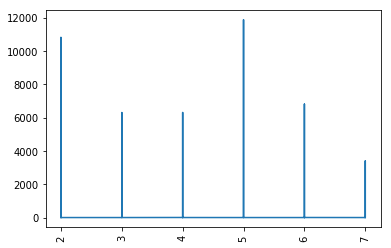

In [15]:
#Month vs Like_Count
train_dataset5=train_dataset4.sort_values('date',ascending=True)
train_dataset5['like_count']=train_dataset5['like_count'].astype(float)
train_dataset5['month']=pd.DatetimeIndex(train_dataset5['date']).month
plt.plot(train_dataset5['month'],train_dataset5['like_count'])
plt.xticks(rotation='vertical')

# Observing trend of number of forwards with respect to each month

In [ ]:
#Month vs Forward_Count
train_dataset5=train_dataset4.sort_values('date',ascending=True)
train_dataset5['forward_count']=train_dataset5['forward_count'].astype(float)
train_dataset5['month']=pd.DatetimeIndex(train_dataset5['date']).month
plt.bar(train_dataset5['month'],train_dataset5['forward_count'])
#plt.xticks(rotation='vertical')

# Observing trend of number of comments with respect to each month

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 8 Text xticklabel objects>)

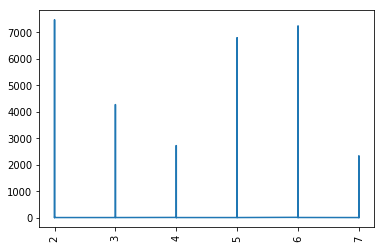

In [52]:
#Month vs Comment_Count
train_dataset5=train_dataset4.sort_values('date',ascending=True)
train_dataset5['comment_count']=train_dataset5['comment_count'].astype(float)
train_dataset5['month']=pd.DatetimeIndex(train_dataset5['date']).month
plt.plot(train_dataset5['month'],train_dataset5['comment_count'])
plt.xticks(rotation='vertical')

(array([1900., 1925., 1950., 1975., 2000., 2025., 2050., 2075., 2100.,
        2125., 2150.]), <a list of 11 Text xticklabel objects>)

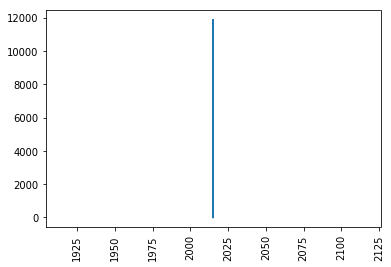

In [53]:
#Year vs Like_Count
train_dataset5=train_dataset4.sort_values('date',ascending=True)
train_dataset5['like_count']=train_dataset5['like_count'].astype(float)
train_dataset5['year']=pd.DatetimeIndex(train_dataset5['date']).year
plt.plot(train_dataset5['year'],train_dataset5['like_count'])
plt.xticks(rotation='vertical')

# Observing trend of number of likes on hourly basis

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

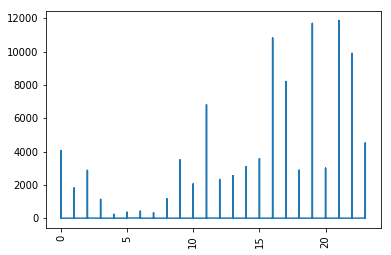

In [16]:
#Hour vs Like_Count
train_dataset5=train_dataset4.sort_values('time',ascending=True)
train_dataset5['like_count']=train_dataset5['like_count'].astype(float)
train_dataset5['hour']=pd.DatetimeIndex(train_dataset5['time']).hour
plt.plot(train_dataset5['hour'],train_dataset5['like_count'])
plt.xticks(rotation='vertical')

In [ ]:
#Hour vs forward_Count
train_dataset5=train_dataset4.sort_values('time',ascending=True)
train_dataset5['forward_count']=train_dataset5['forward_count'].astype(float)
train_dataset5['hour']=pd.DatetimeIndex(train_dataset5['time']).hour
plt.bar(train_dataset5['hour'],train_dataset5['forward_count'])
plt.xticks(rotation='vertical')

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

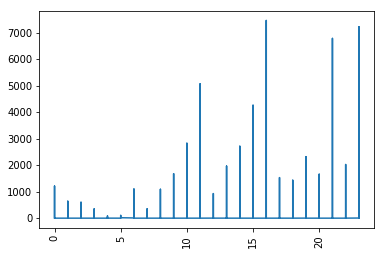

In [18]:
#Hour vs comment_Count
train_dataset5=train_dataset4.sort_values('time',ascending=True)
train_dataset5['comment_count']=train_dataset5['comment_count'].astype(float)
train_dataset5['hour']=pd.DatetimeIndex(train_dataset5['time']).hour
plt.plot(train_dataset5['hour'],train_dataset5['comment_count'])
plt.xticks(rotation='vertical')